In [10]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np
import urllib

In [11]:
earth = pd.read_csv('query_0924_0925.csv')

## !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

## Mini lesson on idxmax (idxmin), which is similar to argmax (argmin) in NumPy: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html

## Remember, this type of function gives us the INDEX of the maximum (or minimum) value in the data structure
## We'll also use a similar function in Xarray!

## !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

### EXAMPLE:  What is the magnitude of the earthquake that occured at the highest latitude in the Northern Hemisphere in this dataset?

In [12]:
# This gives us the max of each column
# But they're not all from the same row/earthquake event necessarily...likely actually NOT AT ALL...
# Yikes! This just tells us the maximum latitude but nothing more about that specific earthquake event
# that occurs at that maximum latitude

mlat1 = earth.max(numeric_only=True) # applied to whole dataframe, returns max of each column by default 
print(mlat1)
print(type(mlat1)) # This is a series

latitude             87.0815
longitude           179.9889
depth               648.2980
mag                   8.8000
nst                 475.0000
gap                 277.0000
dmin                 55.8980
rms                   1.7400
horizontalError      23.7000
depthError           32.5700
magError              0.3890
magNst             1027.0000
dtype: float64
<class 'pandas.core.series.Series'>


In [13]:
# REMINDERS
# dataframe['col name'] is a Series!
# So we will get the max in just that column if we apply the max method to it 
mlat = earth['latitude'].max()
print(mlat) # the maximum latitude

87.0815


In [14]:
# Now....using idxamx gives us the INDEX of the row that has this highest latitude
# Aka, the row in our dataset that contains information about the earthquake event occuring at this highest latitude
mlat_ind = earth['latitude'].idxmax() 
print(mlat_ind) # the row index of this maximum latitude 

2732


In [15]:
# Let's confirm...
       # for loc, we use index labels, not positional integer indices, remember?
       # row index label  # column index label
print(earth.loc[mlat_ind,'latitude']) # One of multiple ways to do this 

print(earth.loc[mlat_ind,:])

# Franz Joseph Land (Russian islands in the Arctic)

87.0815
time                2025-06-08T04:39:28.868Z
latitude                             87.0815
longitude                            48.4406
depth                                   10.0
mag                                      5.2
magType                                  mww
nst                                    120.0
gap                                     25.0
dmin                                   7.687
rms                                      0.7
net                                       us
id                                us6000qiw2
updated             2025-08-20T16:08:58.040Z
place              north of Franz Josef Land
type                              earthquake
horizontalError                         2.75
depthError                              1.83
magError                                0.11
magNst                                   8.0
status                              reviewed
locationSource                            us
magSource                                 us
Na

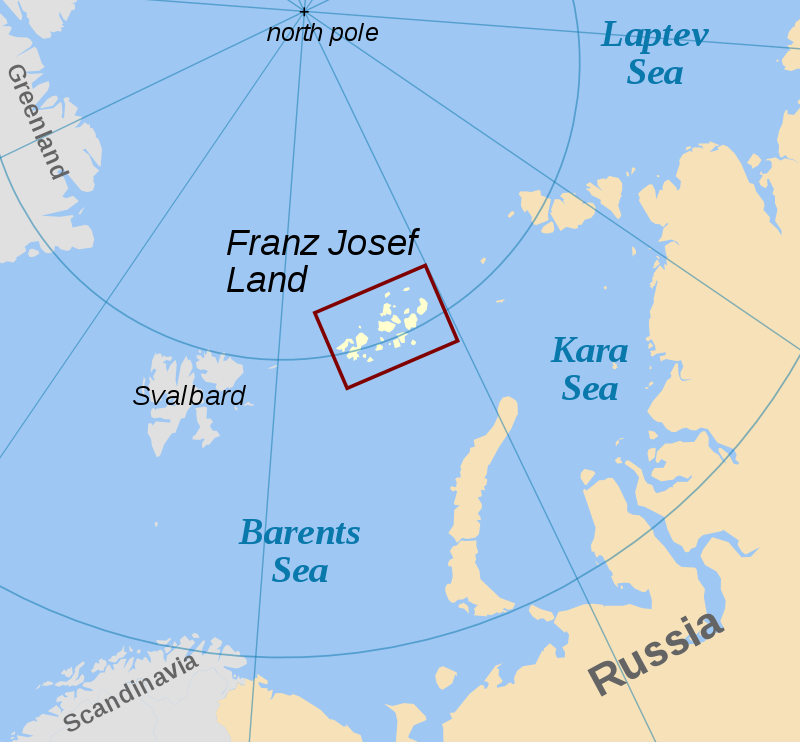

In [16]:
# Now...let's specifically access the magnitude for this event

print(earth.loc[mlat_ind,'mag'])

# The magnitude of this earthquake event was 5.2!

5.2
